In [8]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

train = pd.read_csv('./train.csv')

In [9]:
results_df = pd.DataFrame(columns=['종목코드', 'final_return'])
unique_codes = train['종목코드'].unique()

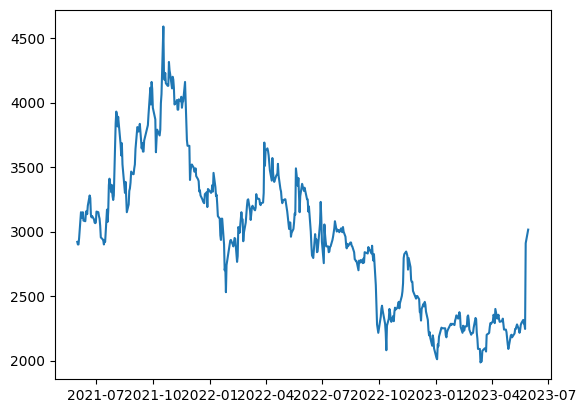

In [20]:
for code in unique_codes:
    train_close = train[train['종목코드'] == code][['일자', '종가']]
    train_close['일자'] = pd.to_datetime(train_close['일자'], format='%Y%m%d')
    #train_close.set_index('일자', inplace=True)
    plt.plot(train_close.일자, train_close.종가)
    plt.show()
    break

In [ ]:
for code in tqdm(unique_codes):
    train_close = train[train['종목코드'] == code][['일자', '종가']]
    train_close['일자'] = pd.to_datetime(train_close['일자'], format='%Y%m%d')
    train_close.set_index('일자', inplace=True)
    tc = train_close['종가']

    model = ARIMA(tc, order=(2, 1, 2))  # order 안의 파라미터는 (AR, Difference, MA)
    """
    - AR : AR이 몇 번째 과거까지를 바라보는지에 대한 파라미터
    - Difference : 차분
    - MA : MA이 몇 번째 과거까지를 바라보는지에 대한 파라미터
    """
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=15) # 향후 15개의 거래일에 대해서 예측
    
    # 최종 수익률 계산
    final_return = (predictions.iloc[-1] - predictions.iloc[0])
    if final_return == 0:
        final_return = -1
    else:
        final_return /= predictions.iloc[0]
    # 결과 저장
    new_df = pd.DataFrame({'종목코드':[code], "final_return":[final_return]})
    results_df = pd.concat([results_df, new_df], ignore_index=True)